In [52]:
!pip install sklearn

In [53]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "iframe" # to be replaced by "iframe" if working on JULIE

df = pd.read_csv('Speed_Dating_Data.csv', encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [54]:
#drop iid duplicates as we want to make sure we identify each person one time
df.drop_duplicates(subset='iid', inplace=True)


In [55]:
#Replacing the gender indexes by their actual names
m = {0 : 'female', 1: 'male'}
df['gender'] = df['gender'].map(m)

In [56]:
#Replacing the race indexes by their actual names
racelist = { 1 : 'black',
             2 : 'white',
             3 : 'latino',
             4 : 'asian',
             5 : 'native american',
             6 : 'other'}

df['race'] = df['race'].map(racelist)


<AxesSubplot: ylabel='None'>

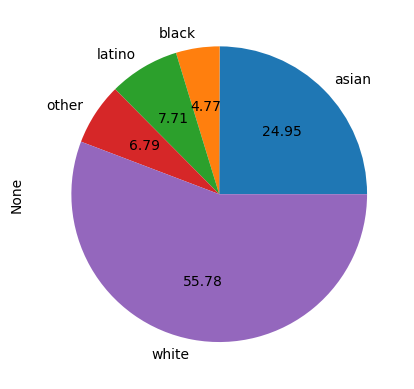

In [57]:
#see the distribution of gender
df.groupby('race').size().plot(kind='pie', autopct='%.2f')

In [58]:
df['race_o'] = df['race_o'].map(racelist)


In [59]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()


print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 551

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,female,3,1,1,10,3,NaN,10,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,female,5,1,1,10,9,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,female,7,1,1,10,6,NaN,3,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,5.0,female,9,1,1,10,4,NaN,1,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN



Percentage of missing values: 


iid          0.000000
id           0.000000
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     76.225045
sinc5_3     76.225045
intel5_3    76.225045
fun5_3      76.225045
amb5_3      76.225045
Length: 195, dtype: float64

<AxesSubplot: ylabel='None'>

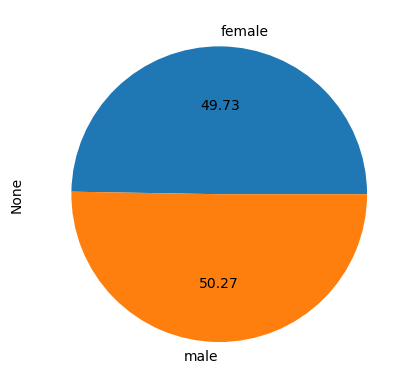

In [60]:
#see the distribution of gender
df.groupby('gender').size().plot(kind='pie', autopct='%.2f')

In [61]:
#Remove all columns where NaN percentage is greater than 3%
perc = 3 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [62]:
print("Percentage of missing values: ")
display((100*df.isnull().sum()/df.shape[0]).sort_values(ascending=False))

Percentage of missing values: 


prob        2.722323
fun_o       2.722323
intel       2.540835
sinc        2.540835
intel_o     2.359347
              ...   
pf_o_amb    0.000000
pf_o_sha    0.000000
dec_o       0.000000
id          0.000000
iid         0.000000
Length: 81, dtype: float64

In [63]:
#As the max percentage of missing value is 2.7%, let's drop all the rows with Nan values
df.dropna(inplace=True)

<AxesSubplot: ylabel='None'>

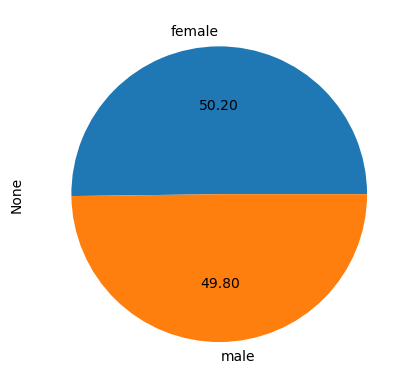

In [64]:
#see the distribution of gender, it is equivalent to before dealing with nan values 
df.groupby('gender').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot: ylabel='None'>

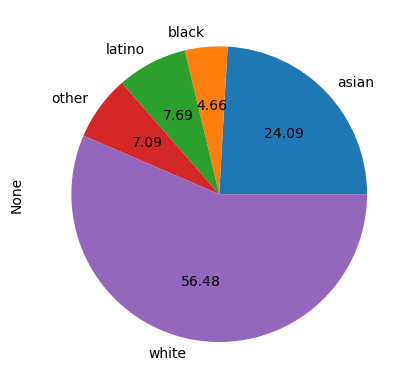

In [65]:
#see the distribution of gender
df.groupby('race').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot: xlabel='age'>

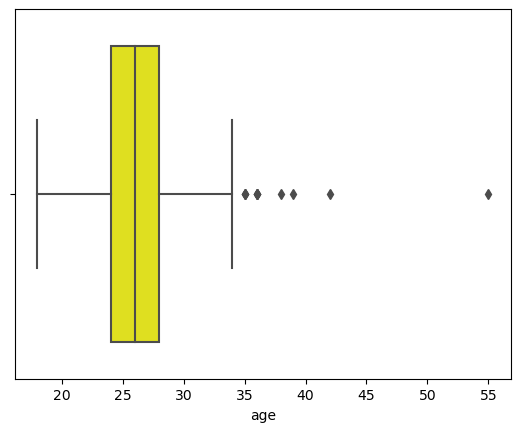

In [66]:
sns.boxplot(x=df["age"], color='yellow')
# we can see that 75% of the population is less than 30 years old and 50% is around 25. 

<AxesSubplot: >

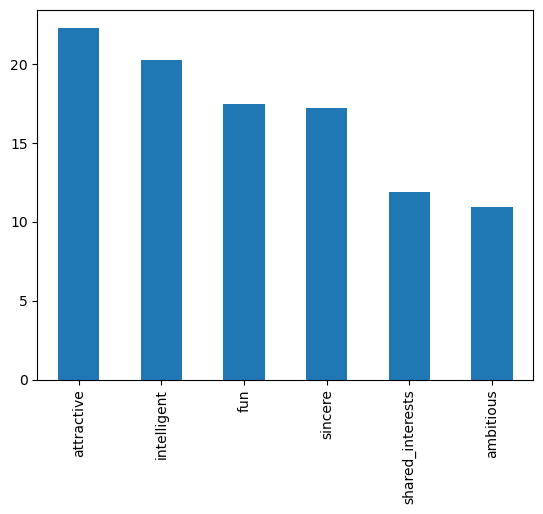

In [67]:
#most important traits before date 
gender_traits = df[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
gender_traits.columns = ['attractive', 'sincere','intelligent','fun','ambitious','shared_interests']

gender_traits_sort = gender_traits.mean().sort_values(ascending=False)
gender_traits_sort.plot(kind='bar')

In [68]:
# personal traits looked for in partners by gender
gender_traits2 = df[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1', 'gender']].groupby('gender').mean()
gender_traits2.columns = ['attractive', 'sincere','intelligent','fun','ambitious','shared_interests']
gender_traits2

,attractive,sincere,intelligent,fun,ambitious,shared_interests
gender,,,,,,
female,17.859919,18.045605,20.869476,17.445282,13.021411,12.738548
male,26.810610,16.416504,19.659837,17.461545,8.877846,11.013821


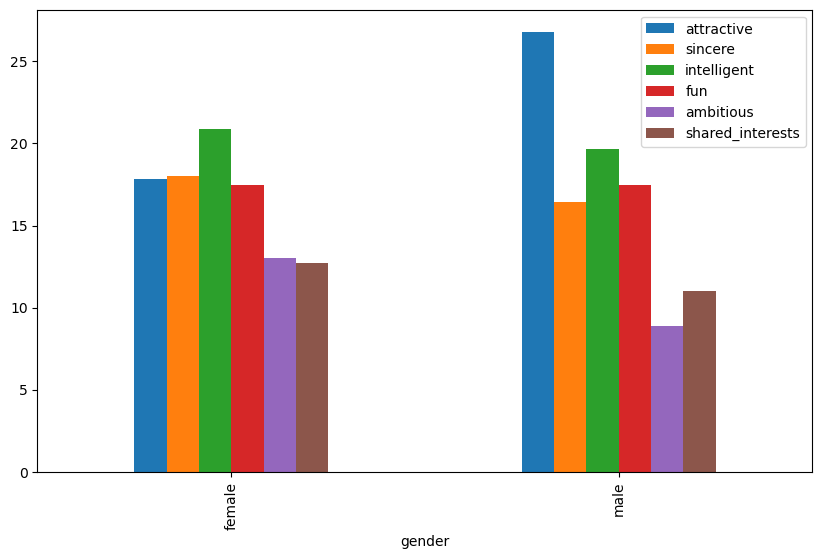

In [69]:
gender_traits2.plot(kind="bar", figsize=(10,6))

plt.show()
# The most important trait for women before date is intelligence 
# The most important trait for men before is attractiveness 

## Correlation between match and traits 

In [70]:
corr_traits = df[["match","int_corr", "samerace", "attr_o","attr3_1", "sinc3_1",
                  "intel3_1","fun3_1","amb3_1", "date", "go_out", "imprelig", "position", "round", ]]

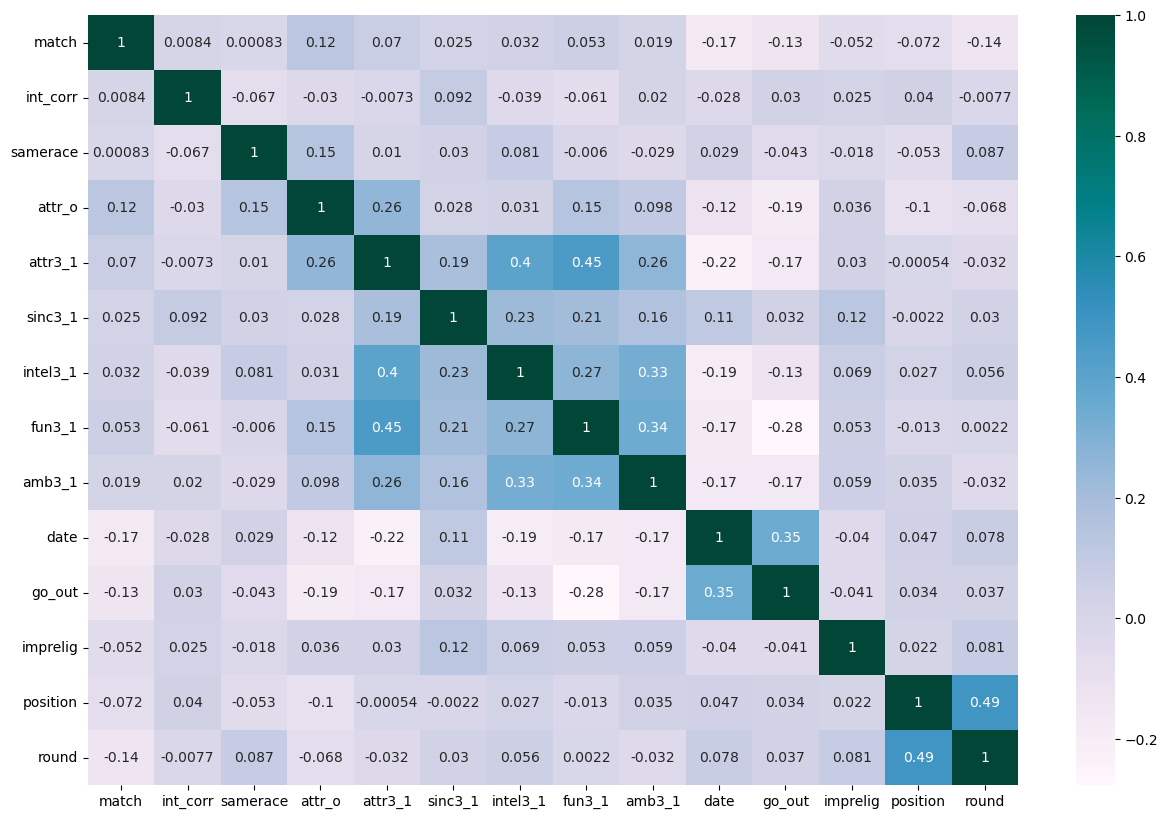

In [71]:
# correlation matrix
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_traits.corr(), annot=True, ax=ax, cmap="PuBuGn");

The most important positive traits are : attractiveness, fun, intelligent, sincere, ambitious.
It also seems that position and round are negatively correlated with a match. It means that, a candidate gets more chance when their position are within the first ones.

# Correlation between match and traits within male group

In [72]:
df_male = df.loc[df['gender']== 'male']
df_male.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,like,prob
100,11,1.0,male,2,1,1,10,7,4,1,...,9.0,7.0,8.0,5.0,0,6.0,8.0,8.0,7.0,4.0
110,12,2.0,male,4,1,1,10,7,3,1,...,9.0,9.0,10.0,9.0,0,7.0,8.0,10.0,8.0,4.0
130,14,4.0,male,8,1,1,10,7,5,1,...,9.0,9.0,9.0,9.0,1,7.0,8.0,9.0,7.0,7.0
140,15,5.0,male,10,1,1,10,7,7,1,...,7.0,7.0,9.0,9.0,1,8.0,7.0,9.0,8.0,6.0
150,16,6.0,male,12,1,1,10,7,6,1,...,6.0,8.0,8.0,6.0,1,7.0,7.0,8.0,7.0,6.0


In [73]:
df_female = df.loc[df['gender']== 'female']
df_female.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,like,prob
30,4,4.0,female,7,1,1,10,6,3,1,...,8.0,9.0,7.0,8.0,0,4.0,10.0,8.0,6.0,7.0
40,5,5.0,female,9,1,1,10,4,1,1,...,3.0,6.0,10.0,8.0,0,5.0,8.0,8.0,7.0,5.0
50,6,6.0,female,11,1,1,10,8,5,1,...,7.0,8.0,9.0,5.0,1,6.0,9.0,7.0,6.0,6.0
60,7,7.0,female,13,1,1,10,5,2,1,...,6.0,5.0,7.0,7.0,0,4.0,8.0,8.0,7.0,4.0
70,8,8.0,female,15,1,1,10,10,7,1,...,4.0,8.0,8.0,8.0,1,5.0,8.0,7.0,4.0,5.0


In [74]:
corr_traits_male = df_male[["match","int_corr", "samerace", "attr_o","attr3_1", "sinc3_1",
                  "intel3_1","fun3_1","amb3_1", "position", "round", "dec_o"]]
corr_traits_female = df_female[["match","int_corr", "samerace", "attr_o","attr3_1", "sinc3_1",
                  "intel3_1","fun3_1","amb3_1", "position", "round", "dec_o"]]

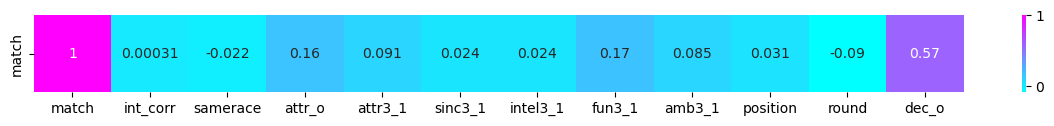

In [75]:
# correlation matrix male
f, ax = plt.subplots(figsize=(15, 1))
sns.heatmap(corr_traits_male.corr().loc[["match"]], annot=True, ax=ax, cmap="cool");

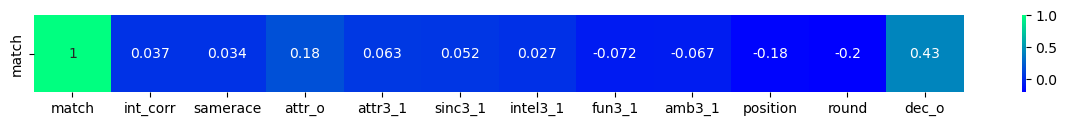

In [76]:
# correlation matrix female
f, ax = plt.subplots(figsize=(15, 1))
sns.heatmap(corr_traits_female.corr().loc[["match"]], annot=True, ax=ax, cmap="winter");

Text(0.5, 1.0, 'Female and Male saying No and Yes')

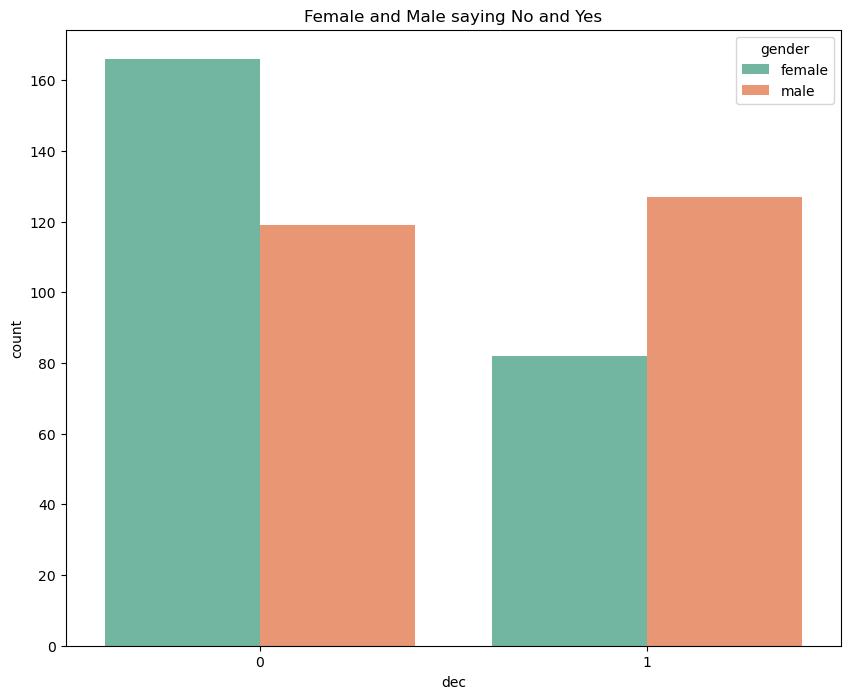

In [77]:
fig, (ax1)=plt.subplots(ncols=1, figsize=[10,8])
sns.countplot(data=df, hue ="gender", x="dec", palette = "Set2", ax=ax1).set_title("Female and Male saying No and Yes")